In [1]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd

from src.algorithms.rl import EnergyCommunitySingleEnv_v0

2023-10-09 16:34:33,425	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
# Use rllib to handle the training

import os
import ray
from ray.tune.registry import register_env
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.impala import ImpalaConfig
from ray import tune

register_env("EC_Single", lambda config: EnergyCommunitySingleEnv_v0())

In [3]:
temp_env = EnergyCommunitySingleEnv_v0()
temp_done = False
temp_env.reset()
while not temp_done:
    action = temp_env.action_space.sample()
    observations, rewards, temp_done, infos = temp_env.step(action)
    #print('Observation: {}'.format(observations))
    print('Reward: {}'.format(rewards))
    #print('Infos: {}\n'.format(infos))

Reward: -4.1723236
Reward: -6.090446345003244
Reward: -22.483800644328234
Reward: -4.078525480103368
Reward: -2.590025538161392
Reward: -4.039913474213088
Reward: -4.6633847871804255
Reward: -24.543053571577914
Reward: -4.974147530964156
Reward: -51.89049012144
Reward: -6.090803105289283
Reward: 13.806411004356637
Reward: -26.163440097377666
Reward: -6.8912297315295445
Reward: 15.11082133209497
Reward: -6.2056700551021216
Reward: 15.562105134078461
Reward: -5.15078285775512
Reward: -70.04863578472
Reward: -50.461328846216205
Reward: -72.40032776832581
Reward: -7.949111763168334
Reward: -71.79919721126556
Reward: -25.098481932045516
Reward: 0.0


In [5]:
# Create an RLlib Algorithm instance from a PPOConfig to learn how to
# act in the above environment - using PPO

ray.shutdown()
ray.init() #num_cpus=2, num_gpus=0)

config = (
    PPOConfig()
    .environment(env=EnergyCommunitySingleEnv_v0)
    .training(
        train_batch_size=128,
        lr=2e-4,
        gamma=0.99,
        #use_critic=True,
        #use_gae=True,
        #shuffle_sequences=True
        #clip_param=0.4,
        #grad_clip=None,
        #entropy_coeff=0.1,
        #vf_loss_coeff=0.25,
        #sgd_minibatch_size=64,
        #num_sgd_iter=10,
    )
    .debugging(log_level='ERROR')
    .framework('torch') #'tf2', eager_tracing=True)
    .rollouts(num_rollout_workers=10)
    .resources(num_gpus=1)#int(os.environ.get("RLLIB_NUM_GPUS", "0")))
)

# Use the config's `build()` method to construct a PPO object.
algo = config.build()

# Train for n iterations and report results (mean episode rewards).
checkpoint = None
for i in range(500):
    results = algo.train()
    print(f"Iter: {i}; avg. reward={results['episode_reward_mean']}")

    if results['episode_reward_mean'] > -100.0:
        break

    # Save the checkpoint to disk.
    #checkpoint = algo.save()
print("checkpoints saved at", checkpoint)

2023-10-09 16:35:22,068	INFO worker.py:1642 -- Started a local Ray instance.
2023-10-09 16:35:24,808	WARNING algorithm_config.py:2578 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
2023-10-09 16:35:24,809	WARNING algorithm_config.py:2578 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
C:\Users\camar\DataspellProjects\phd_thesis\pyeco

Iter: 0; avg. reward=nan
Iter: 1; avg. reward=-569.8266155927828
Iter: 2; avg. reward=-568.7457967331372
Iter: 3; avg. reward=-521.7014941592729
Iter: 4; avg. reward=-522.9034482023515
Iter: 5; avg. reward=-523.050381234064
Iter: 6; avg. reward=-521.7371825204532
Iter: 7; avg. reward=-517.3832071464698
Iter: 8; avg. reward=-513.7825264322803
Iter: 9; avg. reward=-500.60005000113034
Iter: 10; avg. reward=-502.4977441489635
Iter: 11; avg. reward=-495.7379356774123
Iter: 12; avg. reward=-496.11751841567525
Iter: 13; avg. reward=-496.5004225347202
Iter: 14; avg. reward=-495.44574419231037
Iter: 15; avg. reward=-481.6715319873156
Iter: 16; avg. reward=-480.48419253348357
Iter: 17; avg. reward=-481.6850482648795
Iter: 18; avg. reward=-478.7557560964026
Iter: 19; avg. reward=-475.18592733867746
Iter: 20; avg. reward=-476.1003984952107
Iter: 21; avg. reward=-465.0992609793221
Iter: 22; avg. reward=-464.5471424896861
Iter: 23; avg. reward=-465.25930316764885
Iter: 24; avg. reward=-452.080530434

In [7]:
# Get state

algo.get_state()

{'iteration': 112,
 'timesteps_total': None,
 'time_total': 115.09191846847534,
 'episodes_total': 570,
 'last_result': {'custom_metrics': {},
  'episode_media': {},
  'info': {'learner': {'__all__': {'num_agent_steps_trained': 128.0,
     'num_env_steps_trained': 128.0,
     'total_loss': 8.230392662684123},
    'default_policy': {'total_loss': 8.230392662684123,
     'policy_loss': -0.17095382949337362,
     'vf_loss': 8.343017546335856,
     'vf_loss_unclipped': 3394.159464518229,
     'vf_explained_var': 0.27311816612879436,
     'entropy': 21.348242568969727,
     'mean_kl_loss': 0.017069295626909783,
     'default_optimizer_lr': 0.00019999999999999996,
     'curr_lr': 0.0002,
     'curr_entropy_coeff': 0.0,
     'curr_kl_coeff': 3.4171876907348633}},
   'num_env_steps_sampled': 14336,
   'num_env_steps_trained': 0,
   'num_agent_steps_sampled': 14336,
   'num_agent_steps_trained': 0},
  'sampler_results': {'episode_reward_max': 29.38366672583742,
   'episode_reward_min': -275.752

In [6]:
# Check the actions (inference)

env = EnergyCommunitySingleEnv_v0()
obs = env.reset()

done = False
total_reward_prod = 0.0
total_reward_cons = 0.0
episode_info = []
while not done:
    action = algo.compute_single_action(obs)
    obs, reward, done, info = env.step(action)
    episode_info.append(info)

In [7]:
episode_info

[{'total_production': 48.0,
  'energy_requirements': 60.30809,
  'calculated_requirements': 5.566657023277283,
  'import': 5.566657023277283,
  'export': 0.0,
  'batteries_charge': 0.7999999999999998,
  'batteries_discharge': 7.541432976722717,
  'evs_charge': 0.0,
  'evs_discharge': 0.0,
  'storage_01': 8.0,
  'storage_02': 8.458567023277283,
  'storage_03': 4.0,
  'ev_01': 20.0,
  'ev_02': 30.0,
  'ev_03': 20.0,
  'ev_04': 20.0,
  'ev_05': 30.0},
 {'total_production': 58.0,
  'energy_requirements': 52.847466999999995,
  'calculated_requirements': -8.359516089447027,
  'import': 0.0,
  'export': 8.359516089447027,
  'batteries_charge': 1.9999999999999996,
  'batteries_discharge': 5.2069830894470215,
  'evs_charge': 0.0,
  'evs_discharge': 0.0,
  'storage_01': 10.0,
  'storage_02': 3.251583933830262,
  'storage_03': 4.0,
  'ev_01': 20.0,
  'ev_02': 24.0,
  'ev_03': 20.0,
  'ev_04': 16.0,
  'ev_05': 30.0},
 {'total_production': 0.0,
  'energy_requirements': 49.143703,
  'calculated_requ

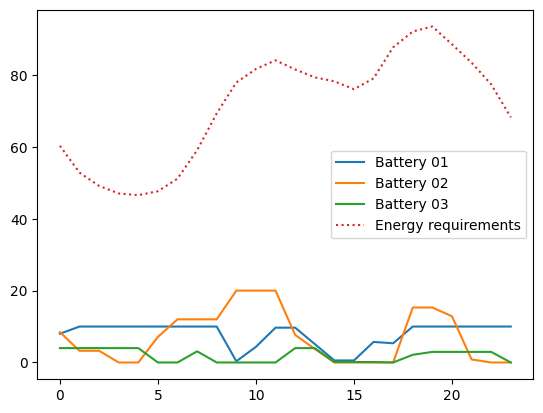

In [8]:
# Plot the battery level

plt.plot([episode_info[i]['storage_01'] for i in range(len(episode_info) - 1)], label='Battery 01')
plt.plot([episode_info[i]['storage_02'] for i in range(len(episode_info) - 1)], label='Battery 02')
plt.plot([episode_info[i]['storage_03'] for i in range(len(episode_info) - 1)], label='Battery 03')
plt.plot(env.energy_requirements, label='Energy requirements',
         linestyle=':')

plt.legend()
plt.show()

In [8]:
os.environ.get("RLLIB_NUM_GPUS", "1")

'1'

True